In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os 
sys.path.append("/home/yoshida/workspace/yoshida/study/modules/")
from read_dose.ddreader import *

# Allocation GPU hardware ID = 0
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[1], 'GPU')

2023-02-02 10:08:14.082095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-02 10:08:16.119246: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-02 10:08:16.120071: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-02 10:08:16.140924: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2023-02-02 10:08:16.141222: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2023-02-02 10:0

In [2]:
model = tf.keras.models.load_model("/home/yoshida/workspace/yoshida/study/two_theta/")

2023-02-02 10:08:17.749011: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 10:08:17.753571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2023-02-02 10:08:17.753611: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-02 10:08:17.753648: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-02-02 10:08:17.753673: I tensorflow/stream_executor/platform/default/dso_

In [3]:
dir_name = "data_06" 
theta_s = [i for i in range(360)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

In [4]:
label = np.zeros((360,360))
for j in range(360):
    label[j][j] = 0.5

In [211]:
itr = np.random.randint(0, len(data), [100,2])

x_test = np.array([data[i[0]] + data[i[1]] for i in itr])

t_test = np.array([label[i[0]] + label[i[1]] for i in itr])    

In [212]:
t_pred = model.predict(x_test)

In [245]:
t_pred[0]

array([1.10643497e-02, 7.18038518e-06, 1.32342102e-05, 1.75057485e-05,
       2.74118029e-05, 3.75421792e-02, 1.87731184e-05, 6.77190383e-06,
       1.12786120e-05, 8.22907168e-06, 3.83238345e-02, 2.13888052e-05,
       2.23148563e-05, 1.26614059e-05, 5.15211696e-06, 7.61091262e-02,
       1.15587700e-05, 7.42935663e-06, 2.77539730e-05, 2.97776551e-05,
       1.78031866e-02, 1.46420934e-05, 3.13182209e-05, 7.37639357e-06,
       9.08933089e-06, 1.29225150e-01, 1.51473623e-05, 2.77112713e-06,
       2.68739714e-05, 1.26381228e-05, 5.79787046e-03, 1.96023284e-05,
       1.43257603e-05, 1.35127721e-05, 4.96632565e-05, 3.28634828e-02,
       1.06100388e-05, 1.14883478e-05, 1.61839343e-05, 1.03617276e-05,
       8.95387866e-03, 2.98751092e-05, 3.34872639e-05, 2.67324613e-05,
       2.33024202e-05, 2.99678766e-04, 5.19343621e-06, 9.67207507e-06,
       1.57739123e-05, 8.54233440e-06, 1.02860259e-03, 1.12651114e-05,
       1.65032598e-05, 1.64344674e-05, 2.71277113e-05, 3.99026042e-03,
      

np.argsortを使用することで、インデックスで順序を返してくれる（昇順）。(降下順を得るためにスライスしている)

In [251]:
t_pred_idx = t_pred[0].argsort()[::-1]

In [252]:
t_pred_idx

array([110,  25, 115,  15,  10,   5,  35,  20, 355,   0,  40, 350, 105,
        30, 335,  55, 305, 290, 340, 320, 345, 330,  70, 310,  90, 275,
       315,  65, 295, 285, 300,  50, 270, 120,  75,  60, 325, 265, 190,
       245,  80, 280, 225, 250,  85, 100, 165, 150, 125,  45, 160, 240,
       220, 205, 195, 260, 135, 170, 210, 255, 235, 155, 200, 145, 175,
       215, 230, 185, 180, 130, 140,  95, 189,  79, 104,  34, 358,  74,
       311, 321, 278, 158, 306, 267, 183, 161, 341,  58, 216, 143, 116,
       203, 199,  42, 324,  98, 212,  72,  22, 172, 153, 191,  41, 307,
       123,  19, 348, 232,  18, 357, 316, 337,   4,  54,  28, 121,  43,
       359, 126, 164, 154, 182, 318, 344, 247, 273, 287, 336, 266, 188,
       211, 167,  88, 346,  96,  44, 136, 122,  97, 102,  12, 128, 242,
       162,  62,  11, 176, 146, 309, 246, 244, 237, 198, 186, 224, 264,
       329,  69, 118,  31, 181, 333, 322,  76, 204, 314, 251, 163,   6,
       323, 112, 107,  83, 349, 277, 187, 201, 192,  81,   3,  6

9.1287875e-06

In [214]:
pred = []
for i in range(100):
    t_pred_idx = t_pred[i].argsort()[::-1]
    pred.append([t_pred_idx[0], t_pred_idx[1]])
pred = np.array(pred)

In [226]:
print(itr.sort())

None


In [227]:
print(pred.sort())

None


推論と、使用した線量にどれほどの差があるか。

In [228]:
diff = pred - itr

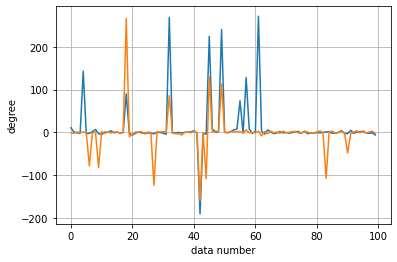

In [241]:
plt.plot(diff)
plt.ylabel("degree")
plt.xlabel("data number")

plt.grid()

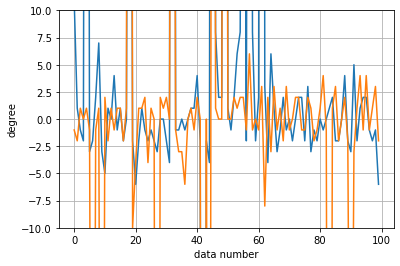

In [240]:
plt.plot(diff)
plt.ylabel("degree")
plt.xlabel("data number")

plt.ylim(-10,10)
plt.grid()

In [230]:
x_pred = np.array([data[i[0]] + data[i[1]] for i in pred])

[ 14 111]


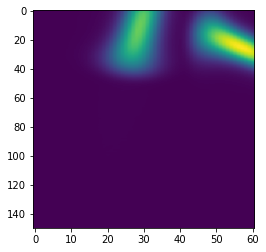

[ 25 110]


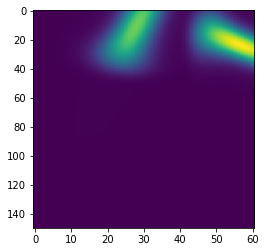

[224 342]


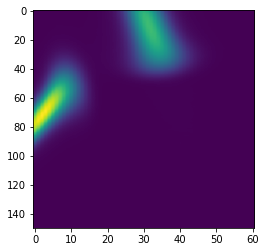

[225 340]


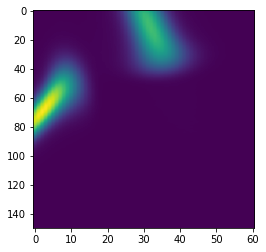

[ 66 229]


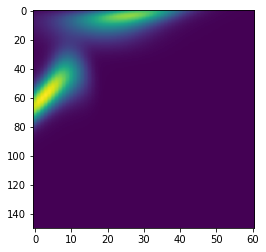

[ 65 230]


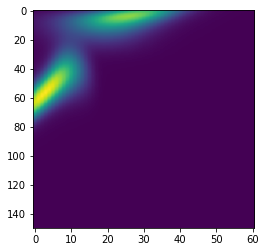

[202 315]


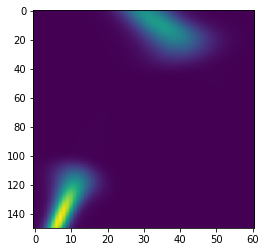

[200 315]


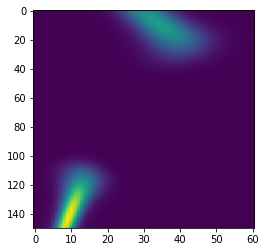

[187 334]


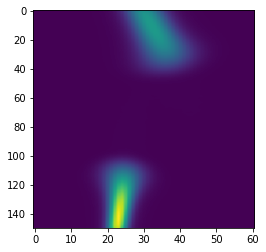

[330 335]


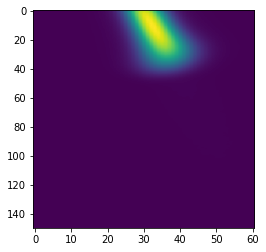

[ 43 286]


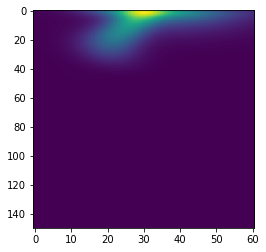

[ 40 285]


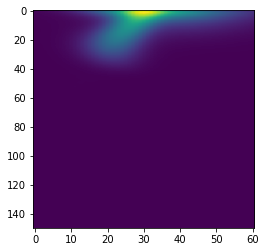

[ 77 158]


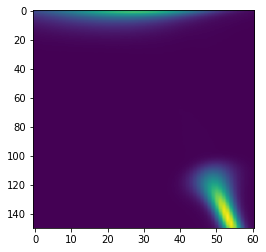

[75 80]


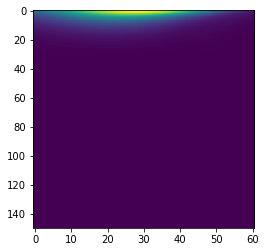

[ 78 306]


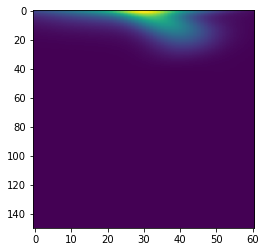

[ 80 305]


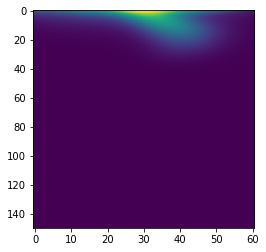

[123 134]


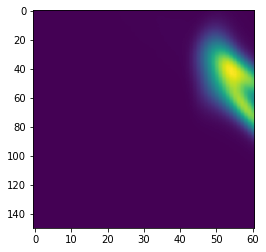

[130 135]


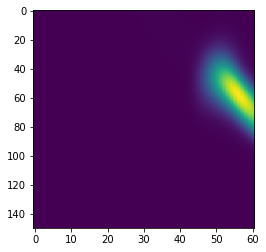

[113 197]


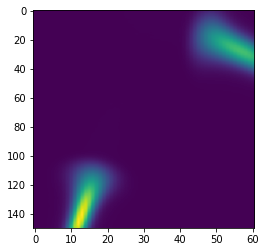

[110 115]


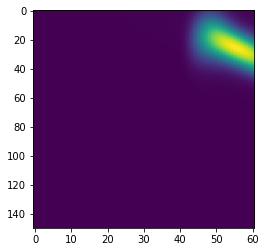

[ 25 218]


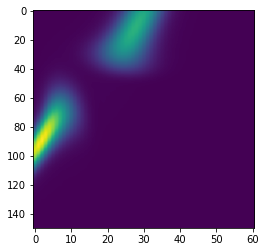

[ 20 220]


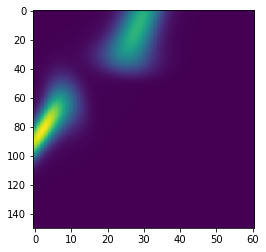

[194 297]


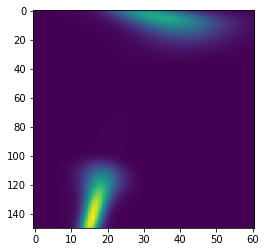

[195 295]


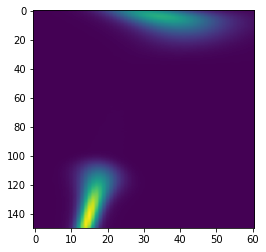

[170 224]


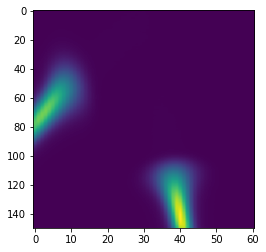

[170 225]


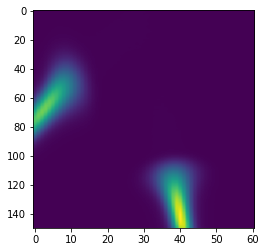

[ 56 221]


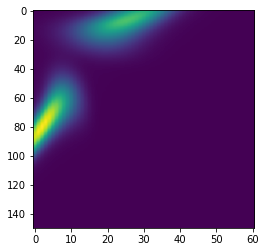

[ 60 220]


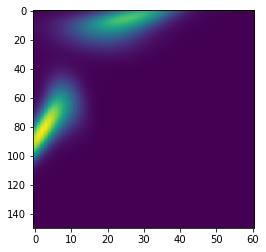

[231 279]


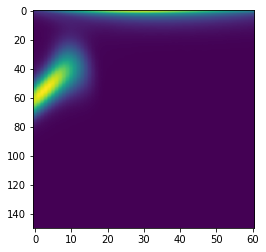

[230 280]


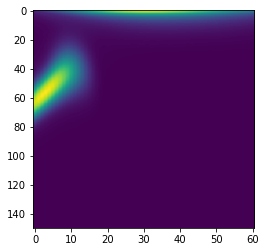

[134 254]


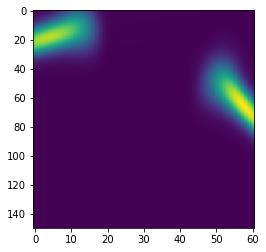

[135 255]


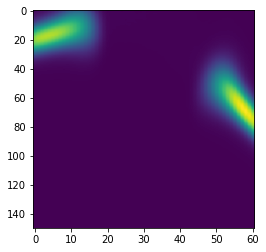

[122 162]


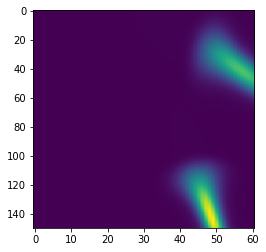

[120 160]


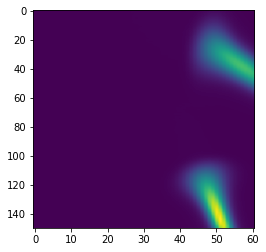

[155 179]


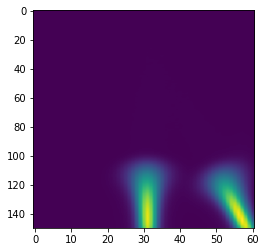

[155 180]


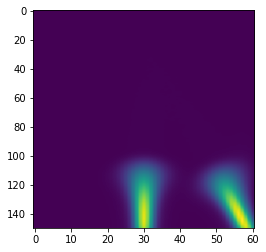

[ 0 89]


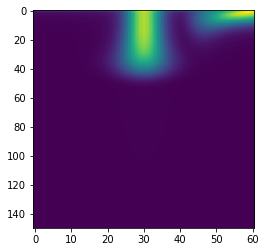

[ 90 355]


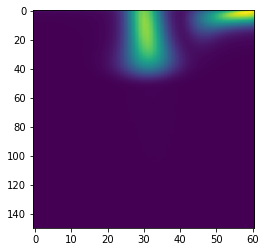

[202 340]


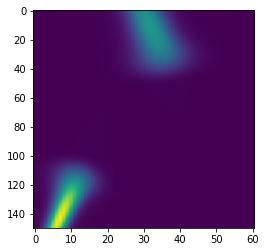

[200 330]


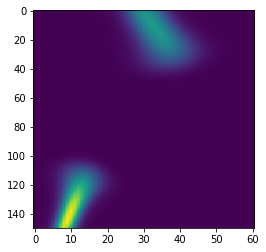

[  6 299]


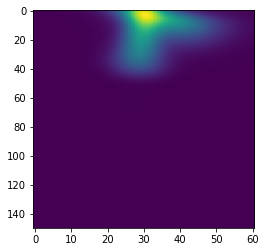

[  0 295]


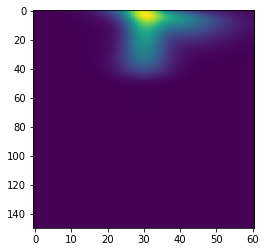

[102 219]


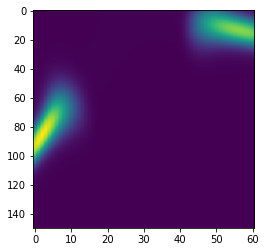

[100 220]


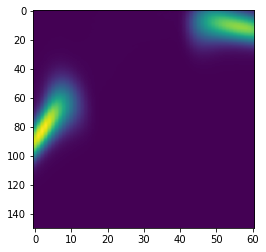

[164 194]


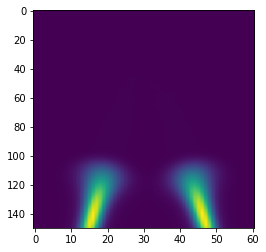

[165 195]


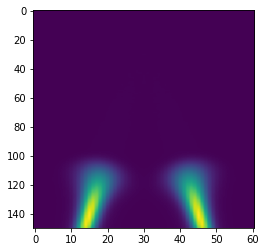

[151 178]


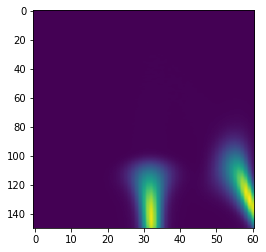

[150 180]


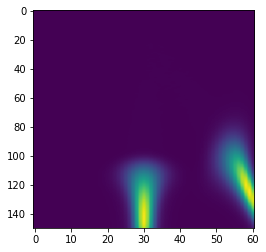

[ 87 299]


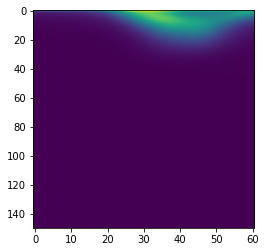

[ 85 295]


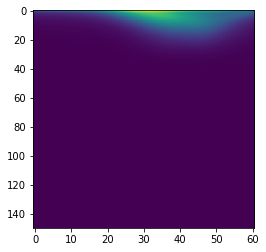

[ 81 304]


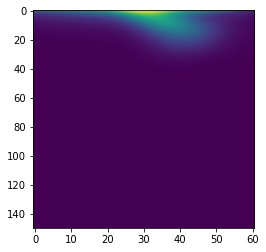

[ 80 305]


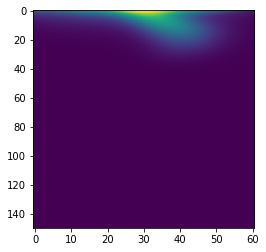

[117 265]


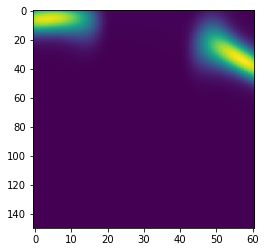

[115 265]


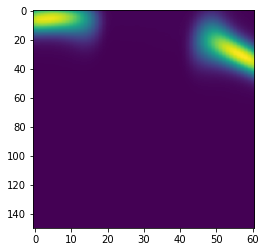

[ 78 203]


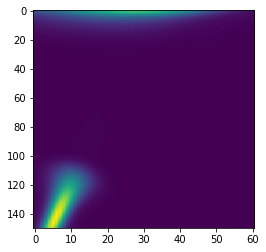

[75 80]


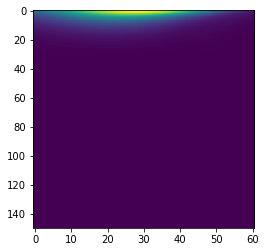

[295 303]


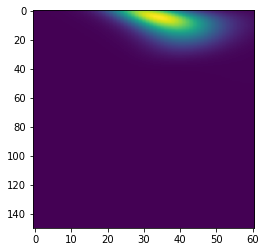

[295 305]


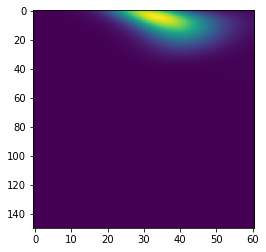

[ 30 174]


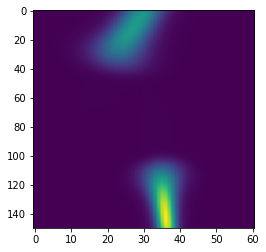

[ 30 175]


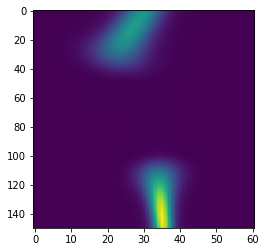

[127 178]


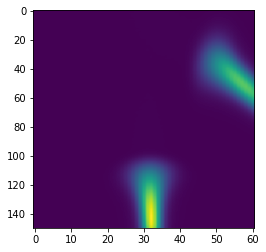

[125 180]


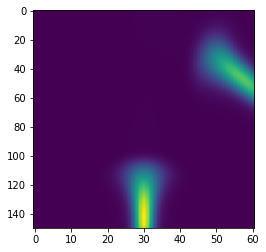

[ 69 260]


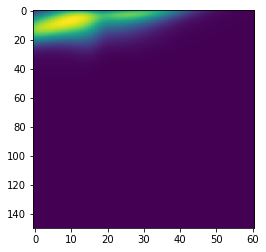

[ 65 260]


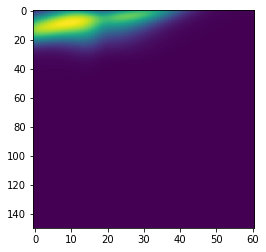

[  2 269]


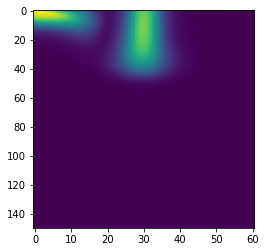

[270 355]


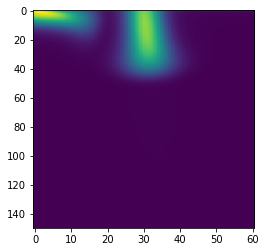

[231 256]


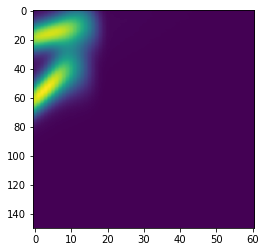

[230 255]


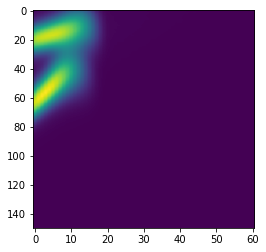

[236 323]


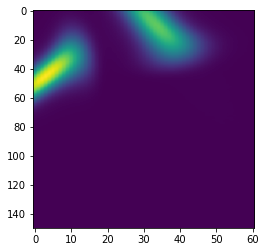

[235 320]


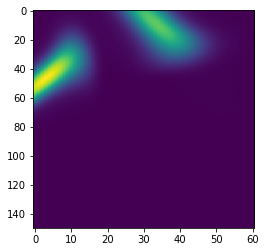

[255 348]


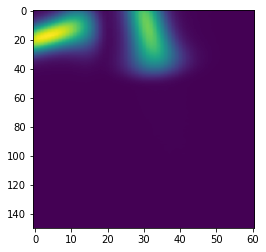

[255 345]


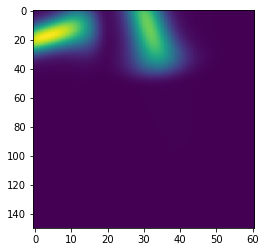

[166 336]


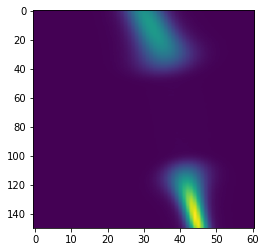

[165 330]


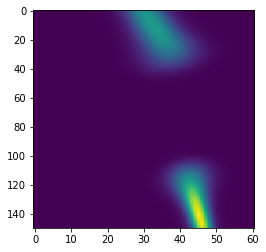

[170 275]


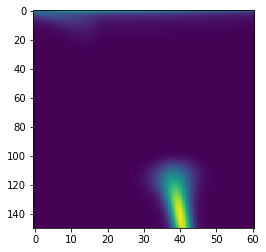

[170 275]


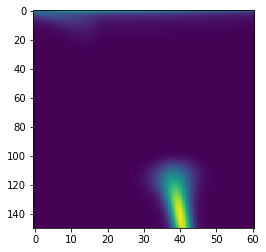

[ 34 169]


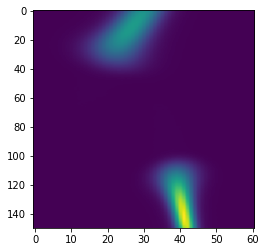

[ 35 170]


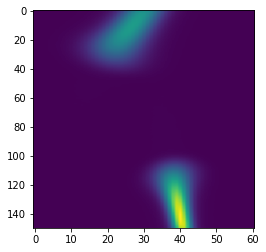

[ 89 131]


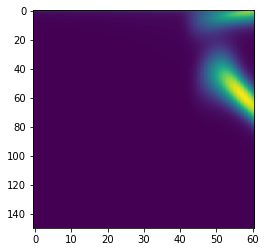

[ 90 130]


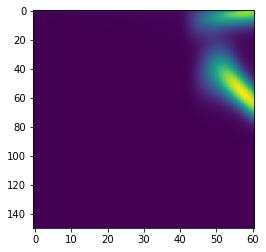

[ 26 173]


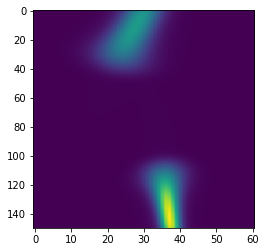

[ 30 175]


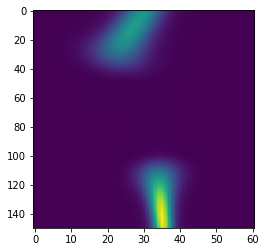

[217 235]


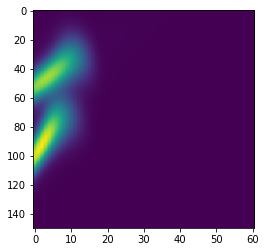

[215 235]


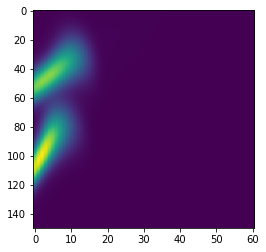

[190 349]


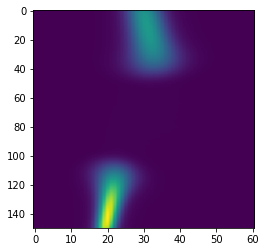

[  0 190]


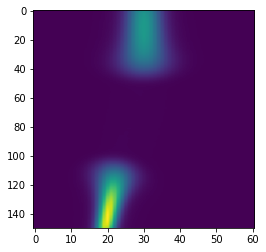

[137 215]


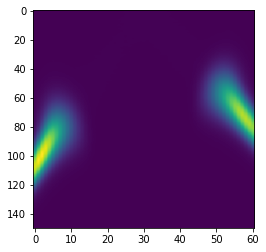

[135 215]


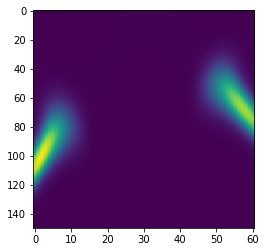

[ 94 203]


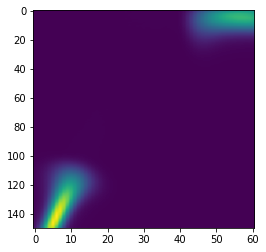

[90 95]


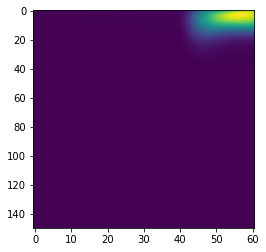

[  1 226]


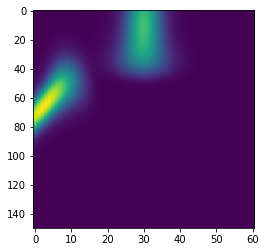

[225 355]


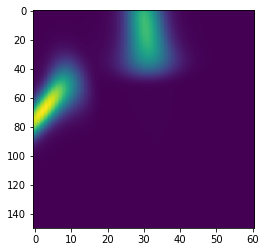

[107 119]


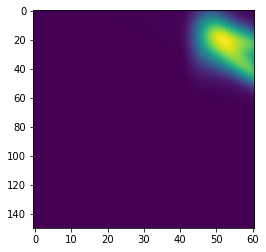

[115 120]


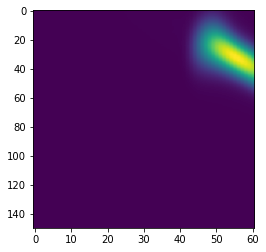

[68 80]


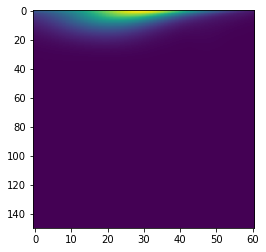

[70 80]


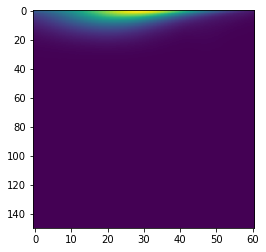

[ 63 330]


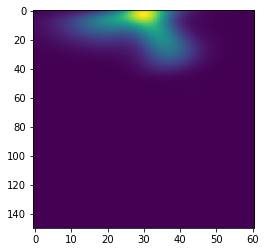

[ 65 330]


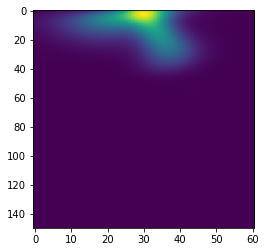

[  0 242]


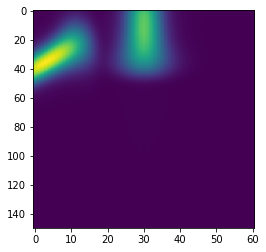

[240 355]


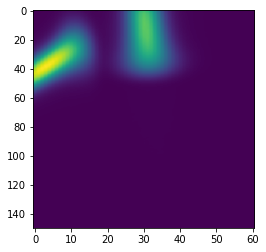

[154 210]


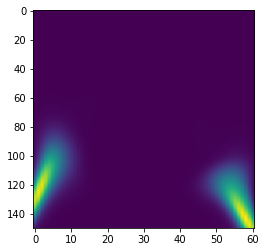

[155 210]


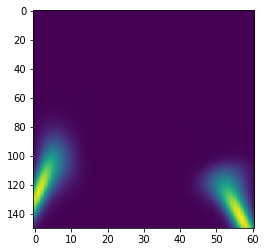

[ 66 175]


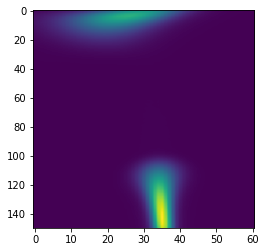

[ 65 175]


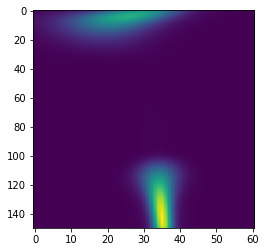

[208 253]


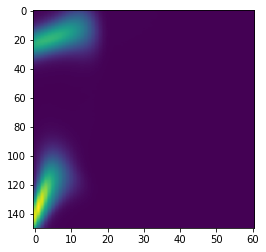

[210 255]


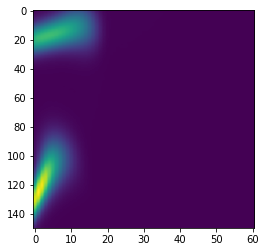

[59 69]


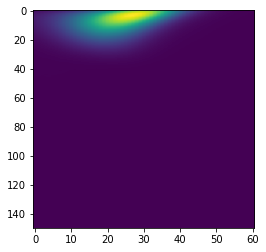

[65 70]


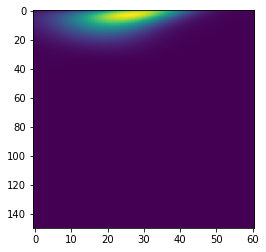

[ 27 353]


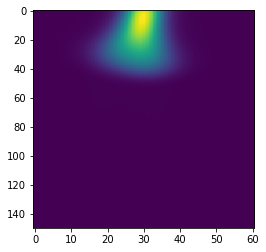

[ 35 355]


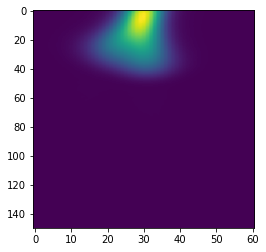

[ 26 103]


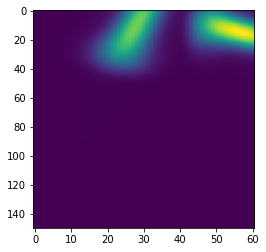

[100 105]


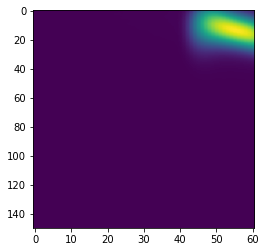

[ 87 141]


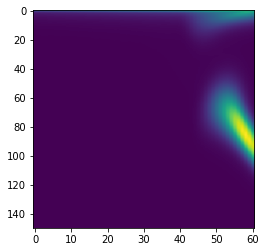

[ 85 140]


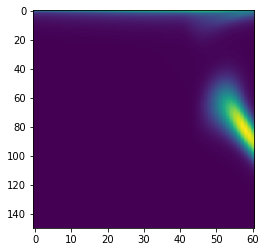

[217 349]


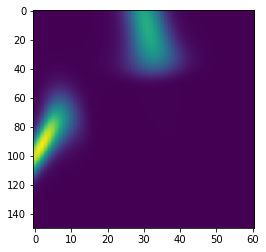

[345 355]


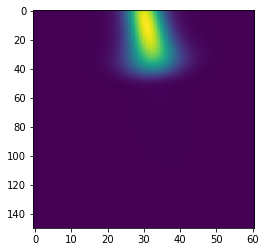

[307 321]


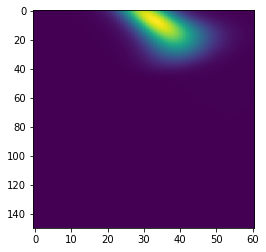

[315 320]


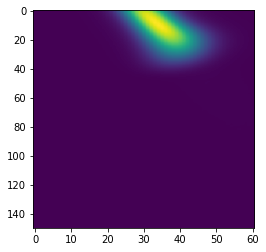

[187 245]


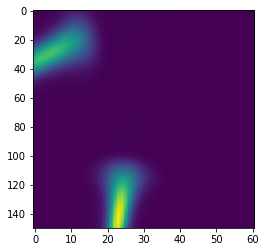

[185 245]


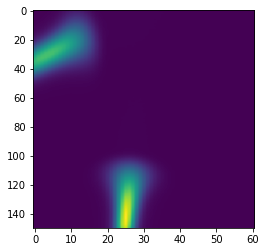

[158 271]


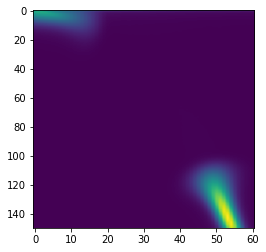

[160 270]


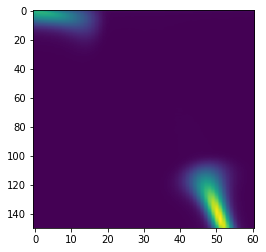

[  9 282]


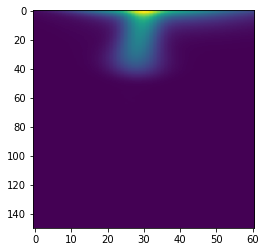

[280 285]


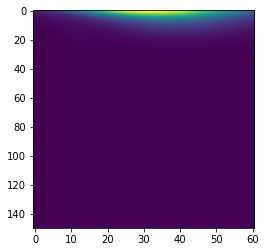

[62 78]


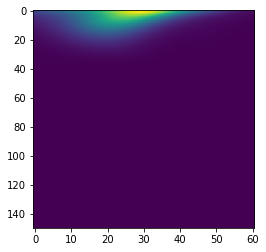

[65 70]


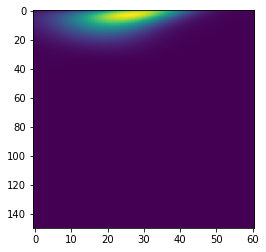

[  4 148]


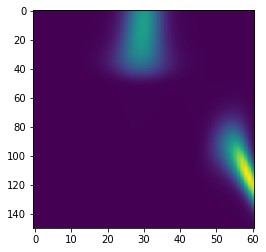

[  0 150]


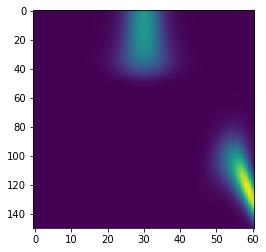

[324 338]


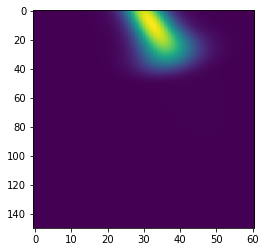

[330 335]


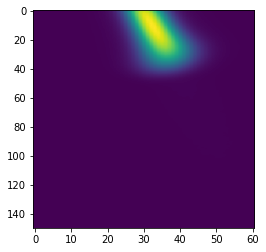

[164 352]


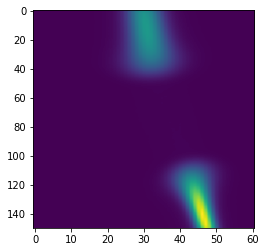

[165 355]


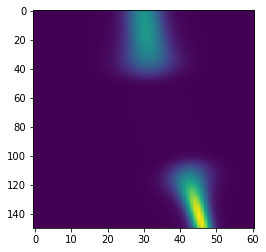

[118 186]


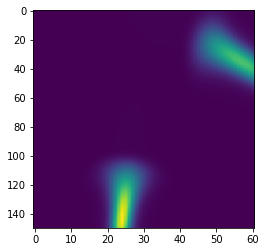

[115 185]


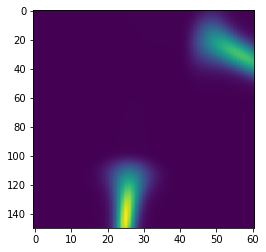

[ 21 224]


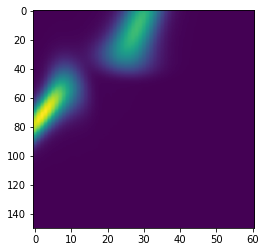

[ 20 225]


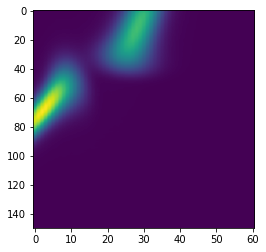

[ 63 332]


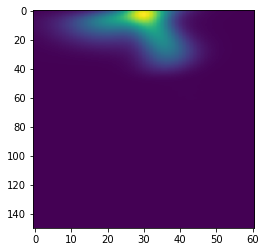

[ 65 330]


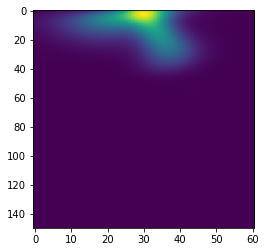

[126 347]


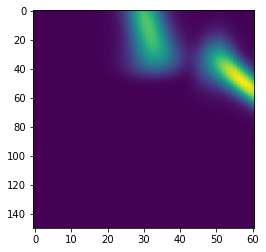

[125 350]


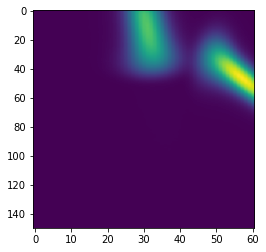

[245 316]


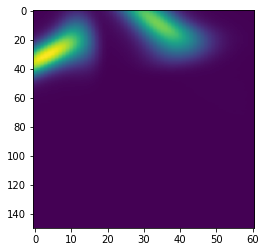

[245 315]


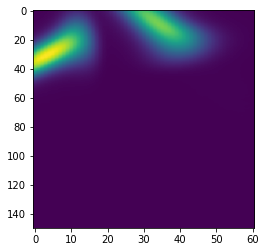

[102 270]


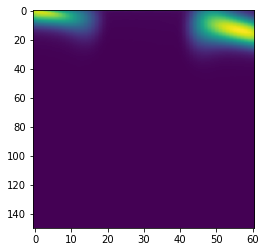

[100 270]


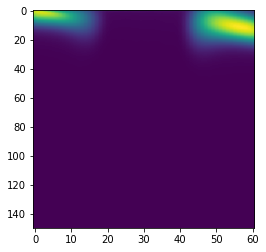

[110 203]


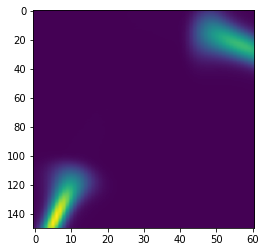

[110 205]


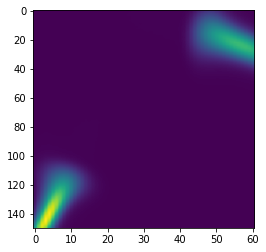

[ 58 158]


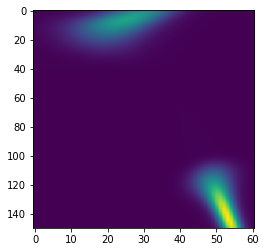

[ 60 160]


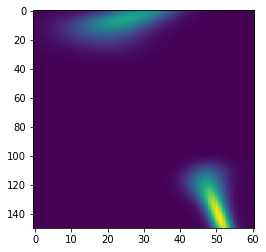

[138 291]


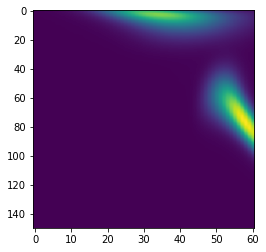

[140 290]


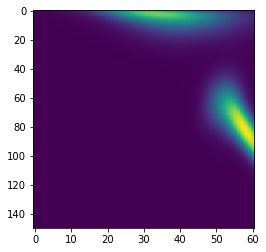

[ 57 276]


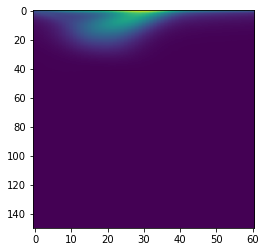

[ 55 275]


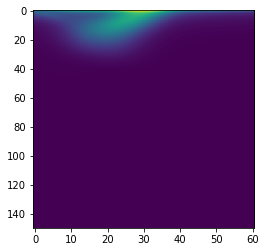

[197 208]


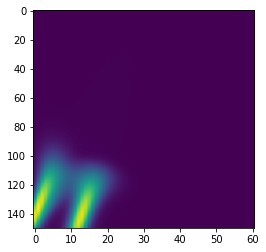

[200 210]


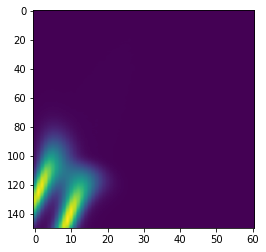

[73 74]


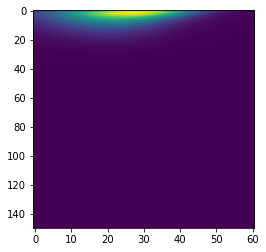

[70 75]


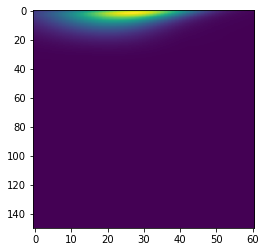

[141 152]


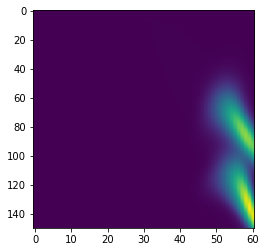

[140 150]


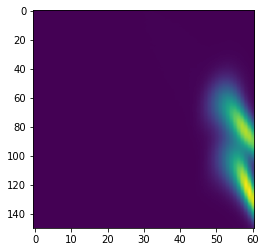

[122 351]


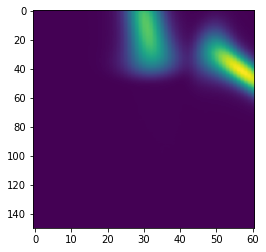

[120 350]


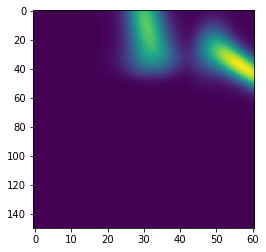

[ 90 249]


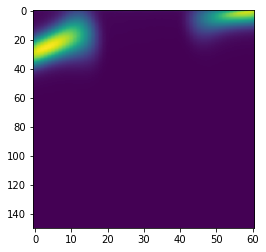

[ 90 250]


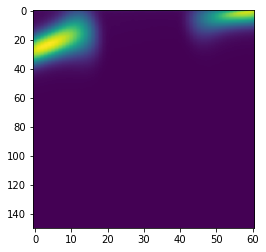

[ 86 271]


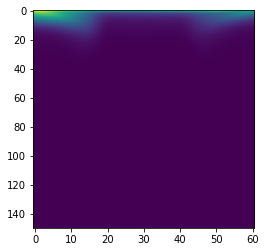

[ 85 275]


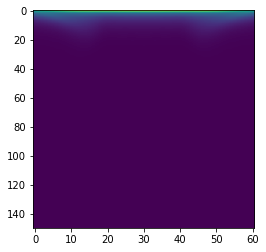

[170 196]


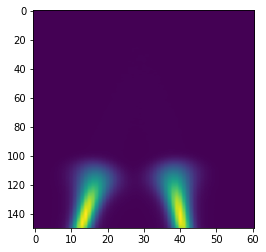

[170 195]


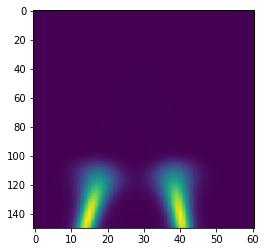

[ 34 147]


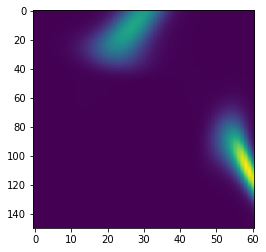

[35 40]


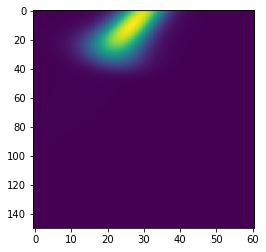

[123 254]


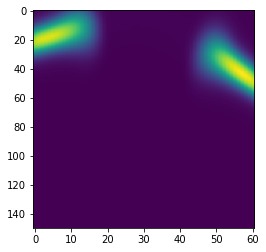

[125 255]


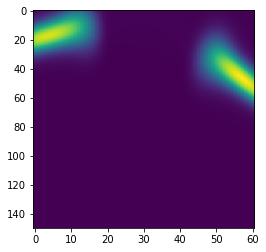

[127 307]


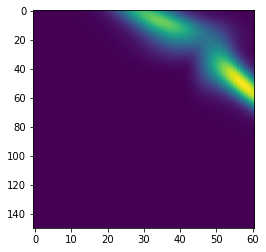

[125 310]


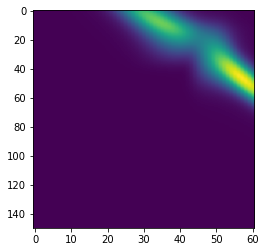

[107 132]


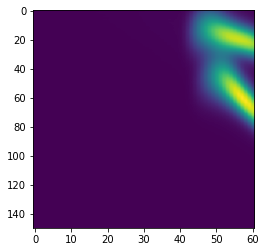

[105 130]


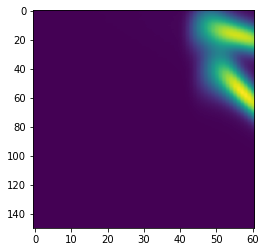

[120 160]


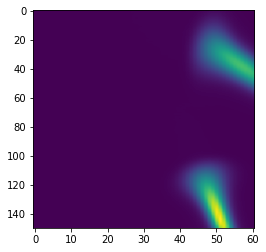

[120 160]


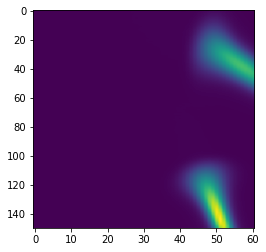

[ 11 213]


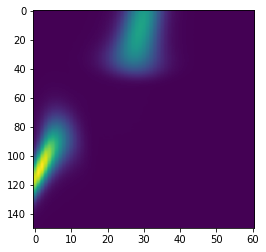

[ 15 215]


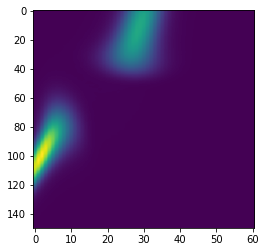

[332 337]


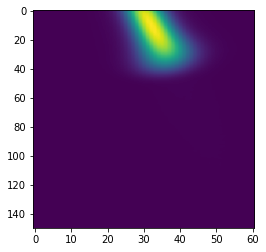

[330 335]


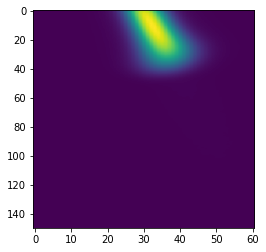

[258 308]


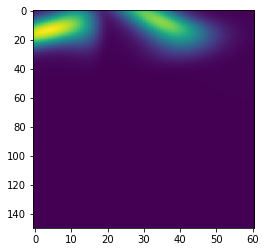

[255 260]


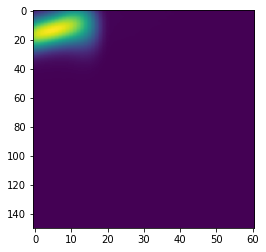

[35 58]


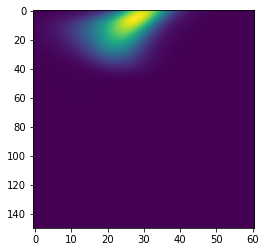

[40 55]


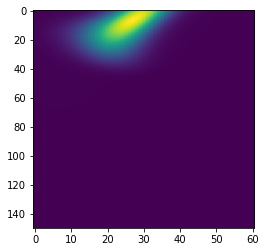

[177 259]


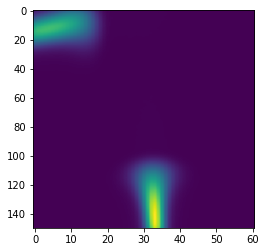

[175 260]


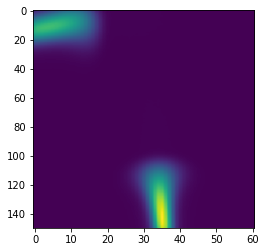

[224 326]


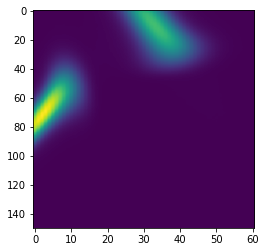

[225 330]


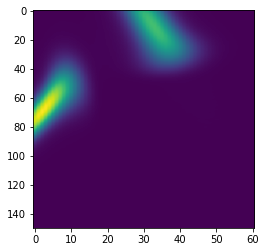

[108 131]


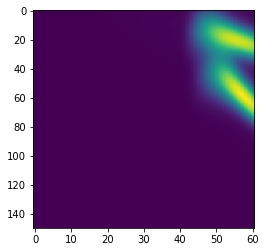

[110 130]


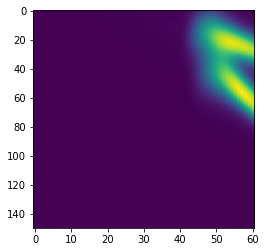

[223 311]


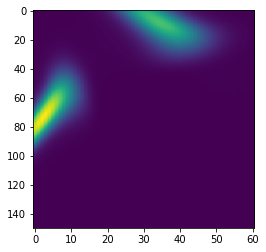

[225 315]


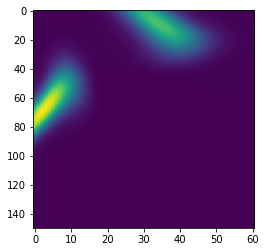

[ 71 151]


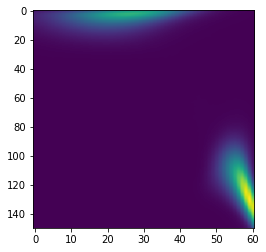

[ 70 150]


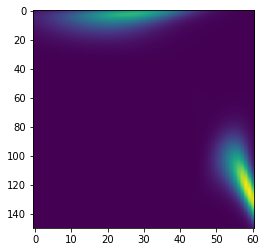

[ 87 259]


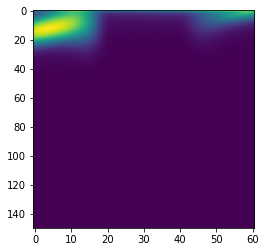

[ 85 260]


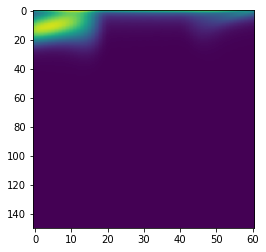

[171 327]


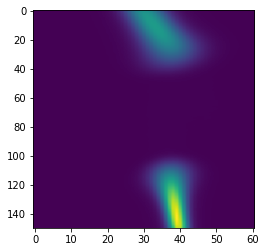

[170 330]


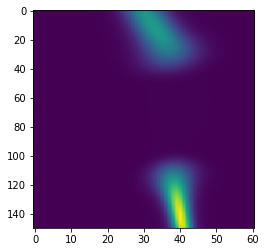

[ 21 167]


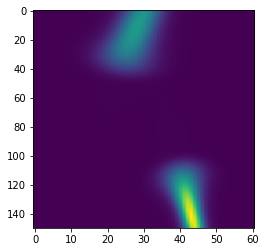

[ 15 165]


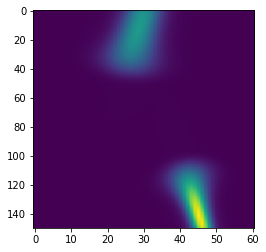

In [259]:
for i in range(100):
    dd_pred = x_pred[i]
    dd_test = x_test[i]
    
    print(itr[i])
    plt.imshow(dd_test.reshape(150,61,61).sum(2), aspect=0.4)
    plt.show()
    plt.close()
    
    print(pred[i])
    plt.imshow(dd_pred.reshape(150,61,61).sum(2), aspect=0.4)
    plt.show()
    plt.close()


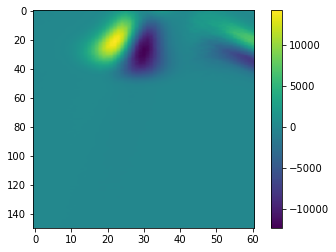

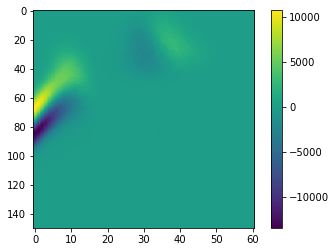

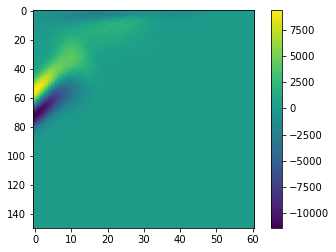

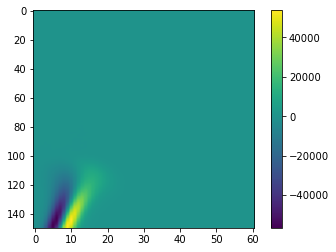

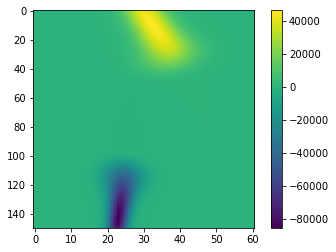

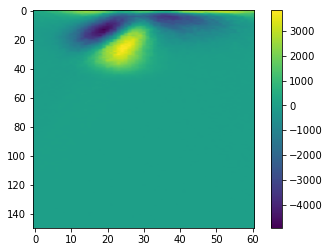

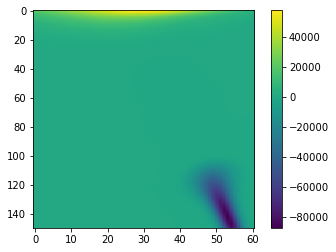

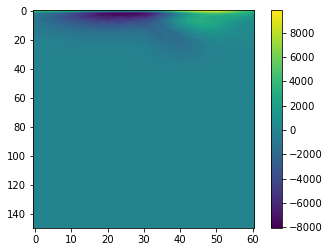

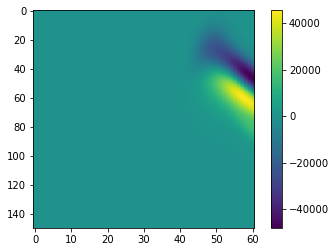

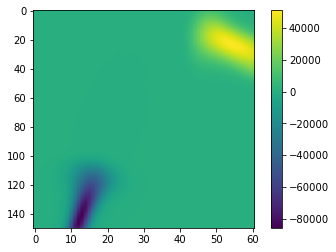

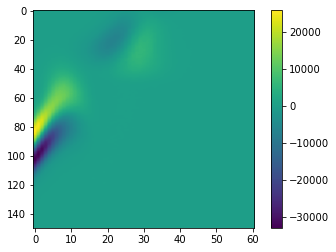

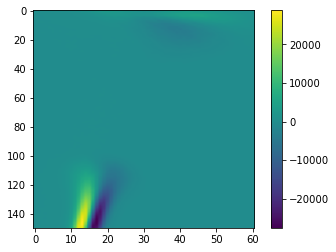

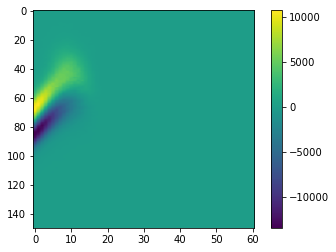

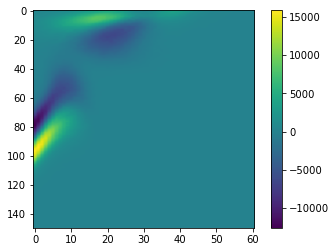

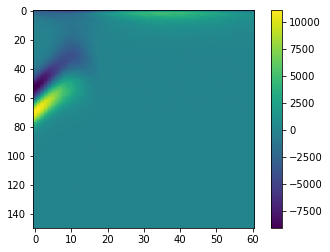

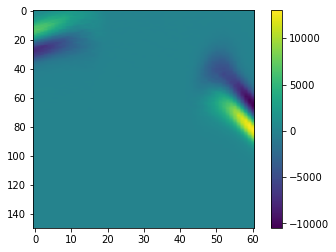

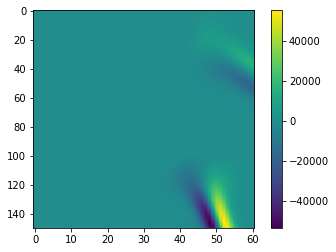

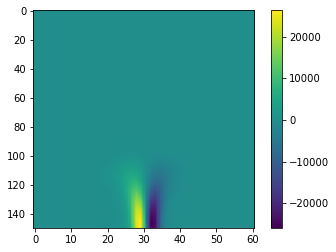

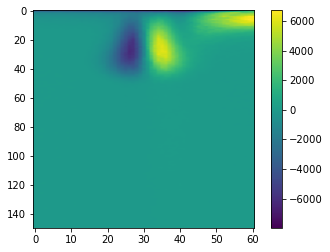

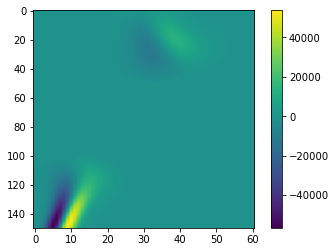

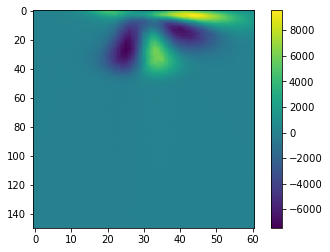

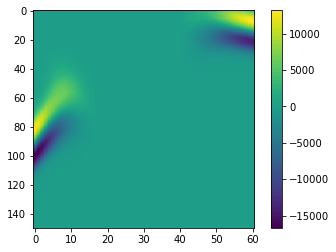

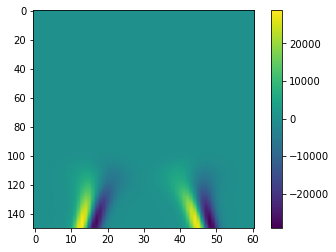

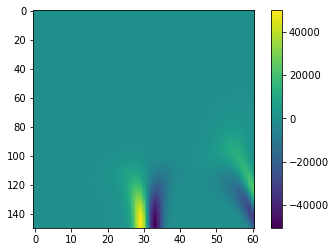

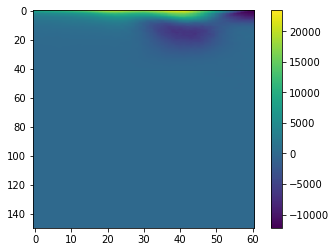

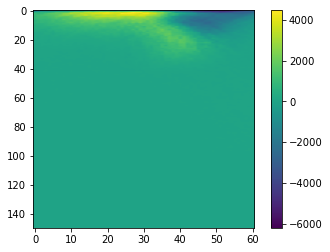

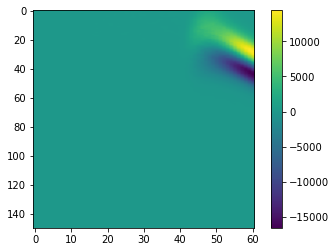

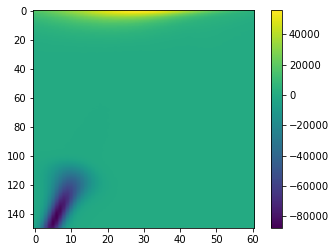

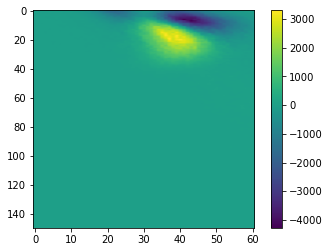

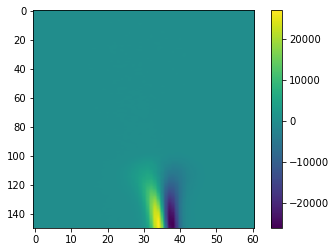

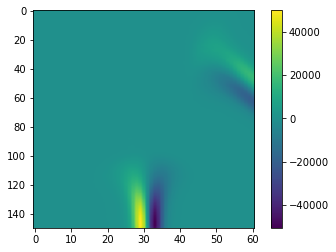

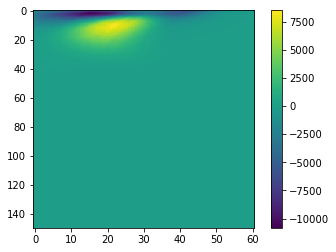

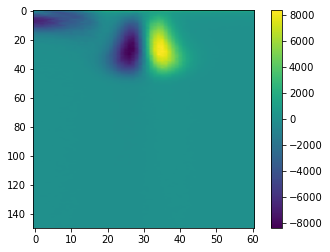

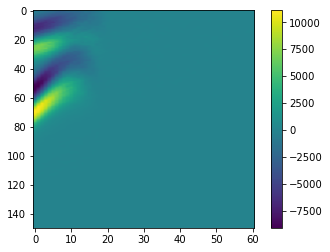

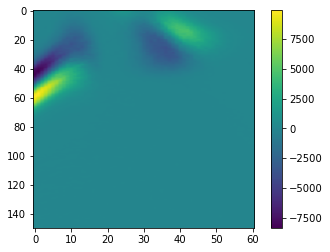

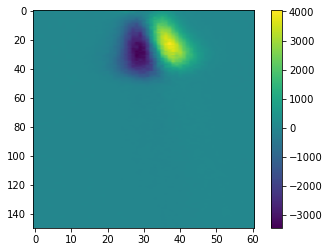

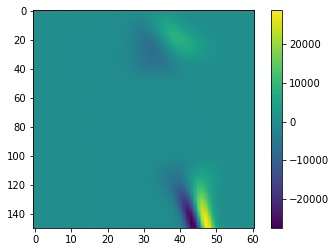

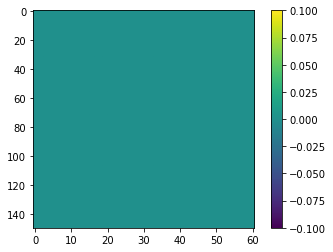

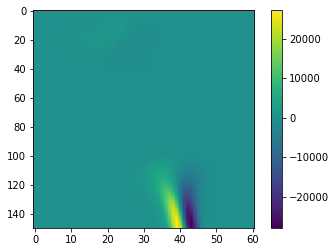

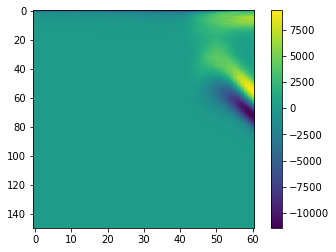

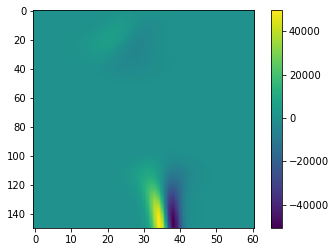

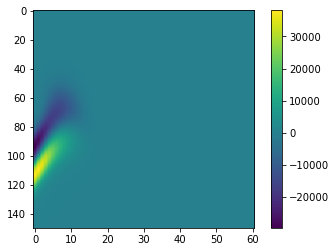

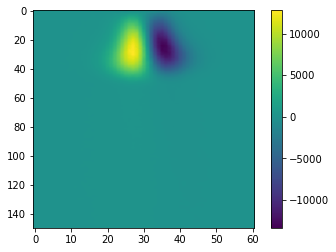

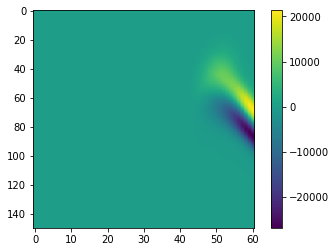

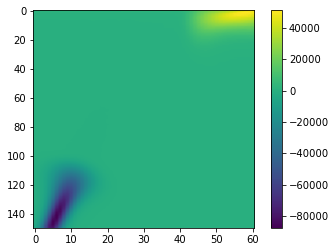

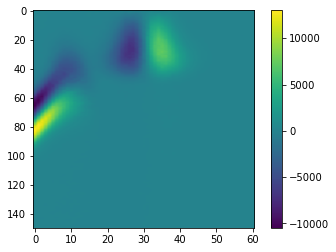

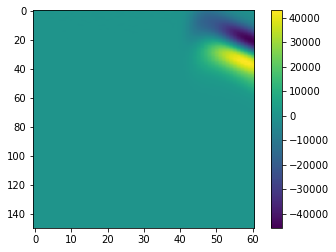

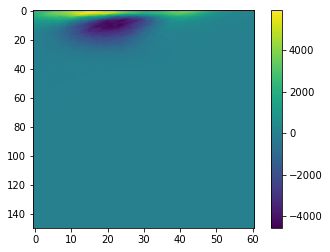

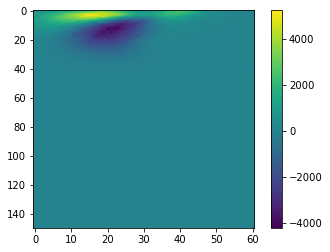

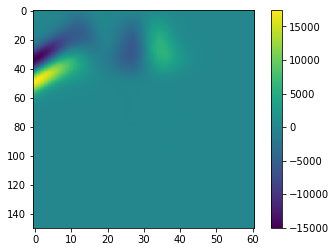

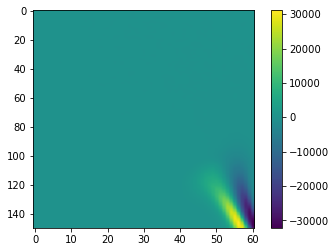

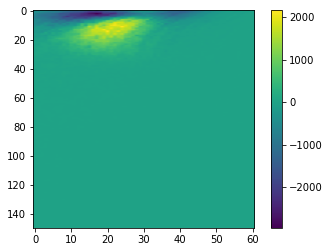

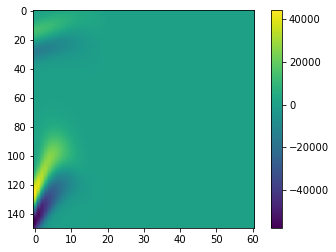

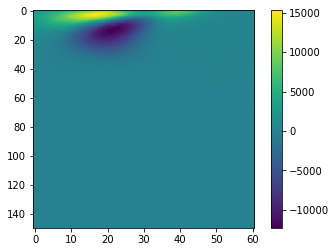

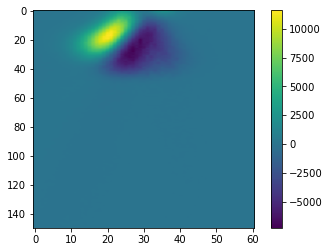

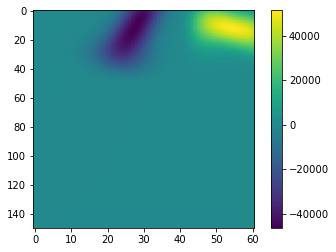

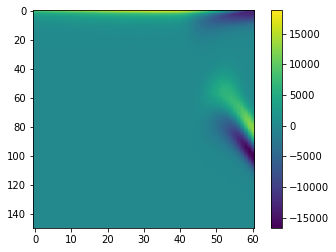

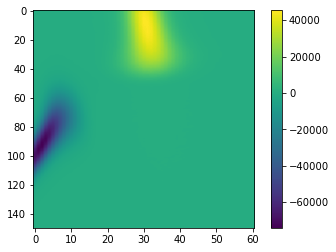

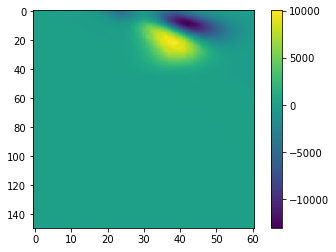

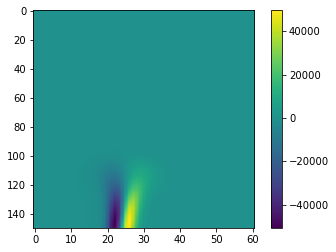

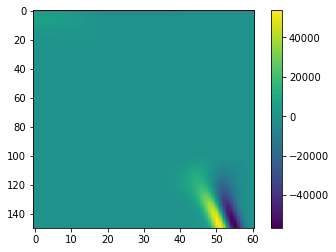

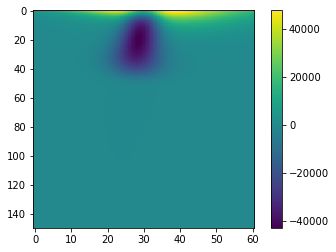

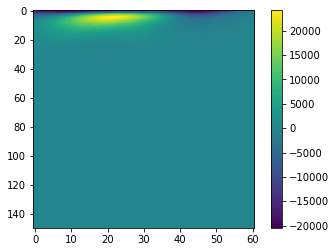

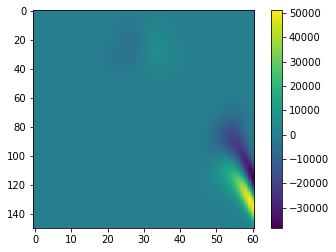

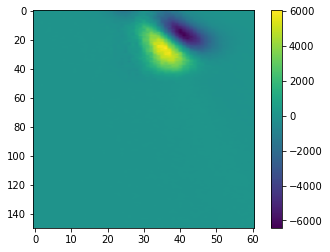

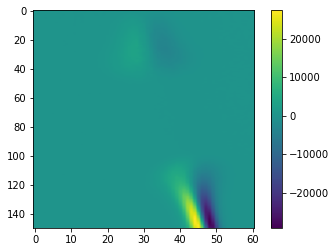

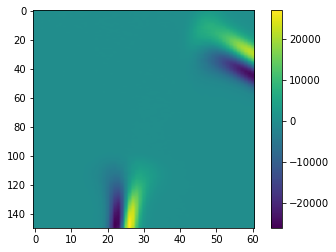

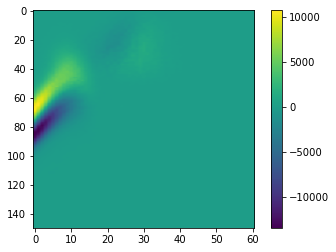

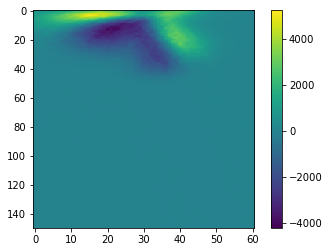

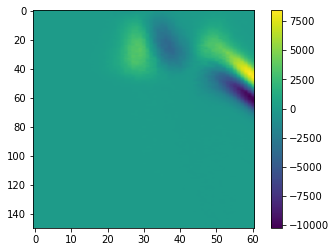

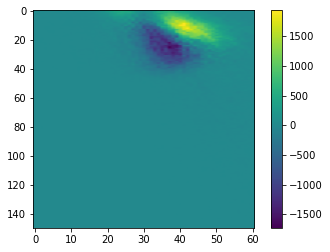

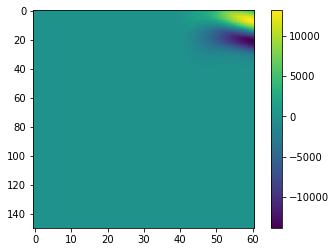

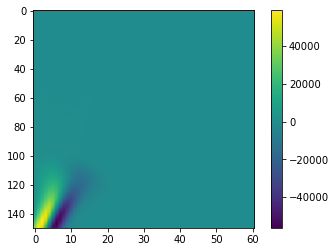

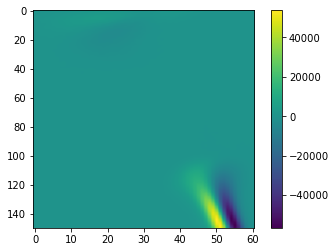

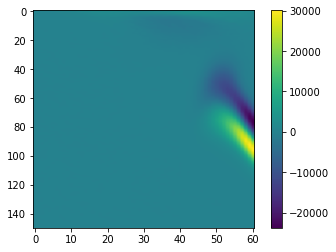

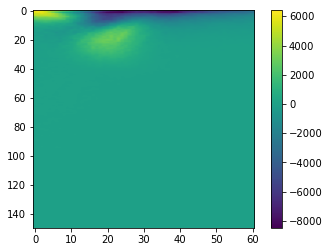

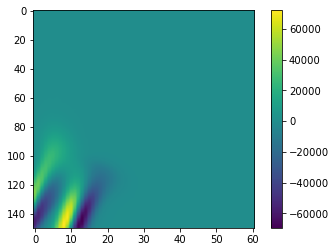

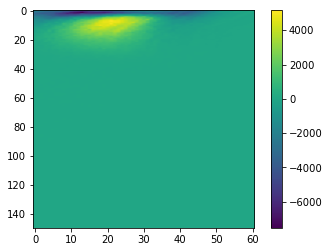

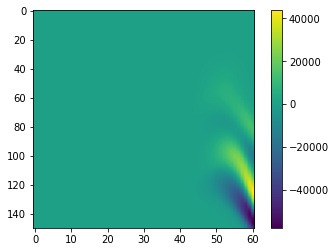

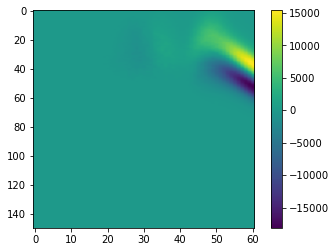

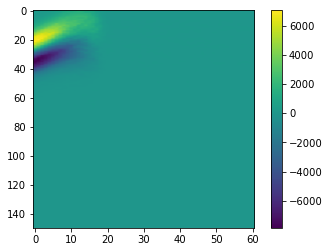

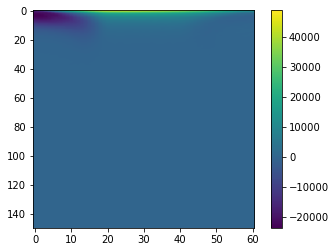

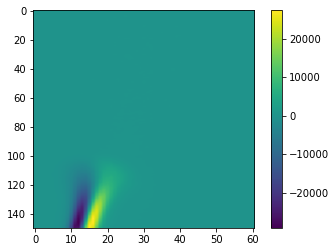

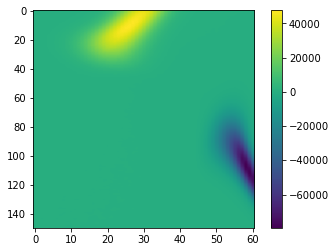

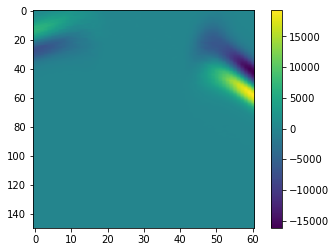

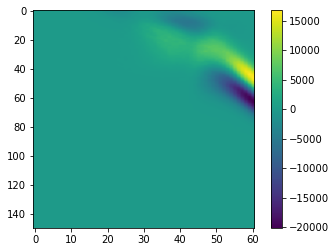

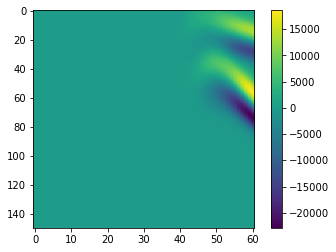

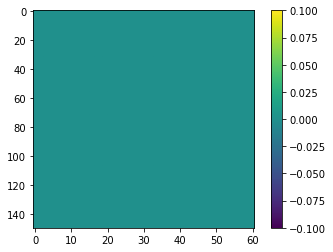

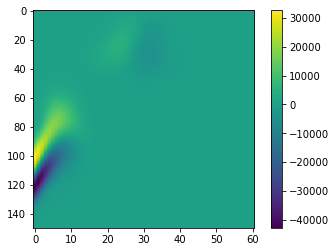

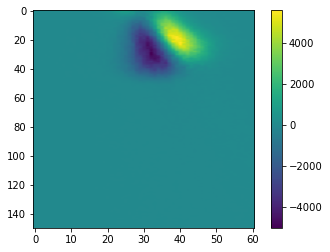

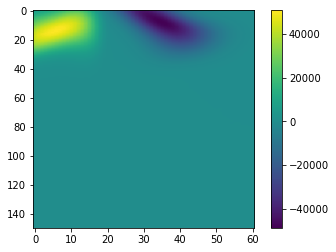

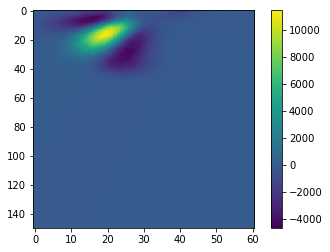

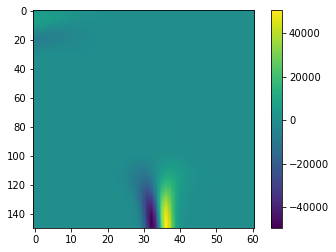

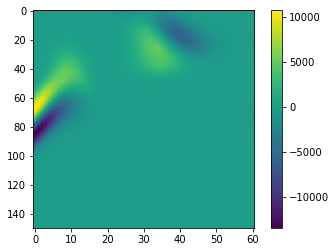

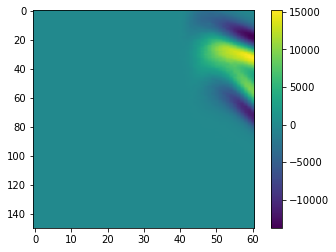

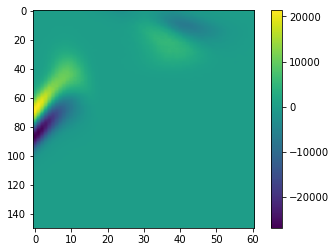

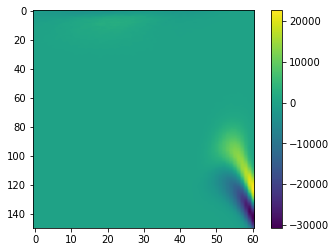

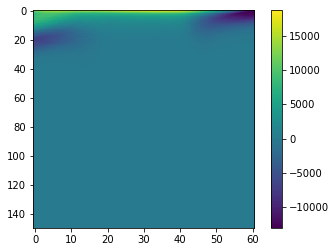

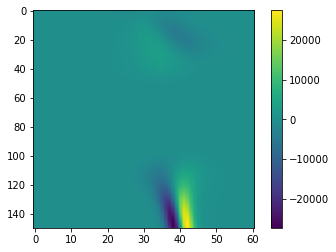

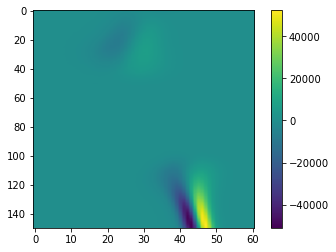

In [221]:
diff = x_pred - x_test
for i in range(100):
    plt.imshow(diff[i].reshape(150,61,61).sum(2), aspect = 0.4)
    plt.colorbar()
    plt.show()
    plt.close()
    

元のデータ作成がうまく行っていない？照射している位置が予定と異なる可能性がある。

再度調べてみる必要がある

In [353]:
a = np.array([[2, 2], [1, 1]])
c = np.array([[[1], [2]],[[1],[2]]])
b = [np.zeros_like(a), np.zeros_like(c)]


In [354]:
id(b[0])

140618387546640

In [355]:
id(b[1])

140618387548848

In [356]:
print(b)

[array([[0, 0],
       [0, 0]]), array([[[0],
        [0]],

       [[0],
        [0]]])]


In [365]:
b[0] = a

In [366]:
b[1] = c

In [367]:
id(b[0])

140618649106256

In [368]:
id(b[1])

140618387548944